[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144]
[0.8975282666644835, 0.0068137999915052205, 0.005614099995000288, 0.005756599974120036, 0.00510109998867847, 0.00565679999999702, 0.006853999977465719, 0.007971450002514757, 0.010243899974739179, 0.018778500001644716, 0.026055800000904128, 0.05027370000607334, 0.09281000000191852, 0.22910769999725744, 0.4266766499931691, 0.8919947499962291, 1.709502199984854, 3.5778464000031818, 7.511175199993886]
[0.2206920999978181, 0.00018569998792372644, 0.00020000000949949026, 0.0003507000219542533, 0.0005163000023458153, 0.0008203999896068126, 0.001382599992211908, 0.003749550014617853, 0.009140699985437095, 0.020191599993268028, 0.02531789999920875, 0.05246459998306818, 0.1294630999909714, 0.412389200006146, 0.4578470999986166, 0.9891885999822989, 1.8399499999941327, 3.7445380999997724, 8.164061599993147]


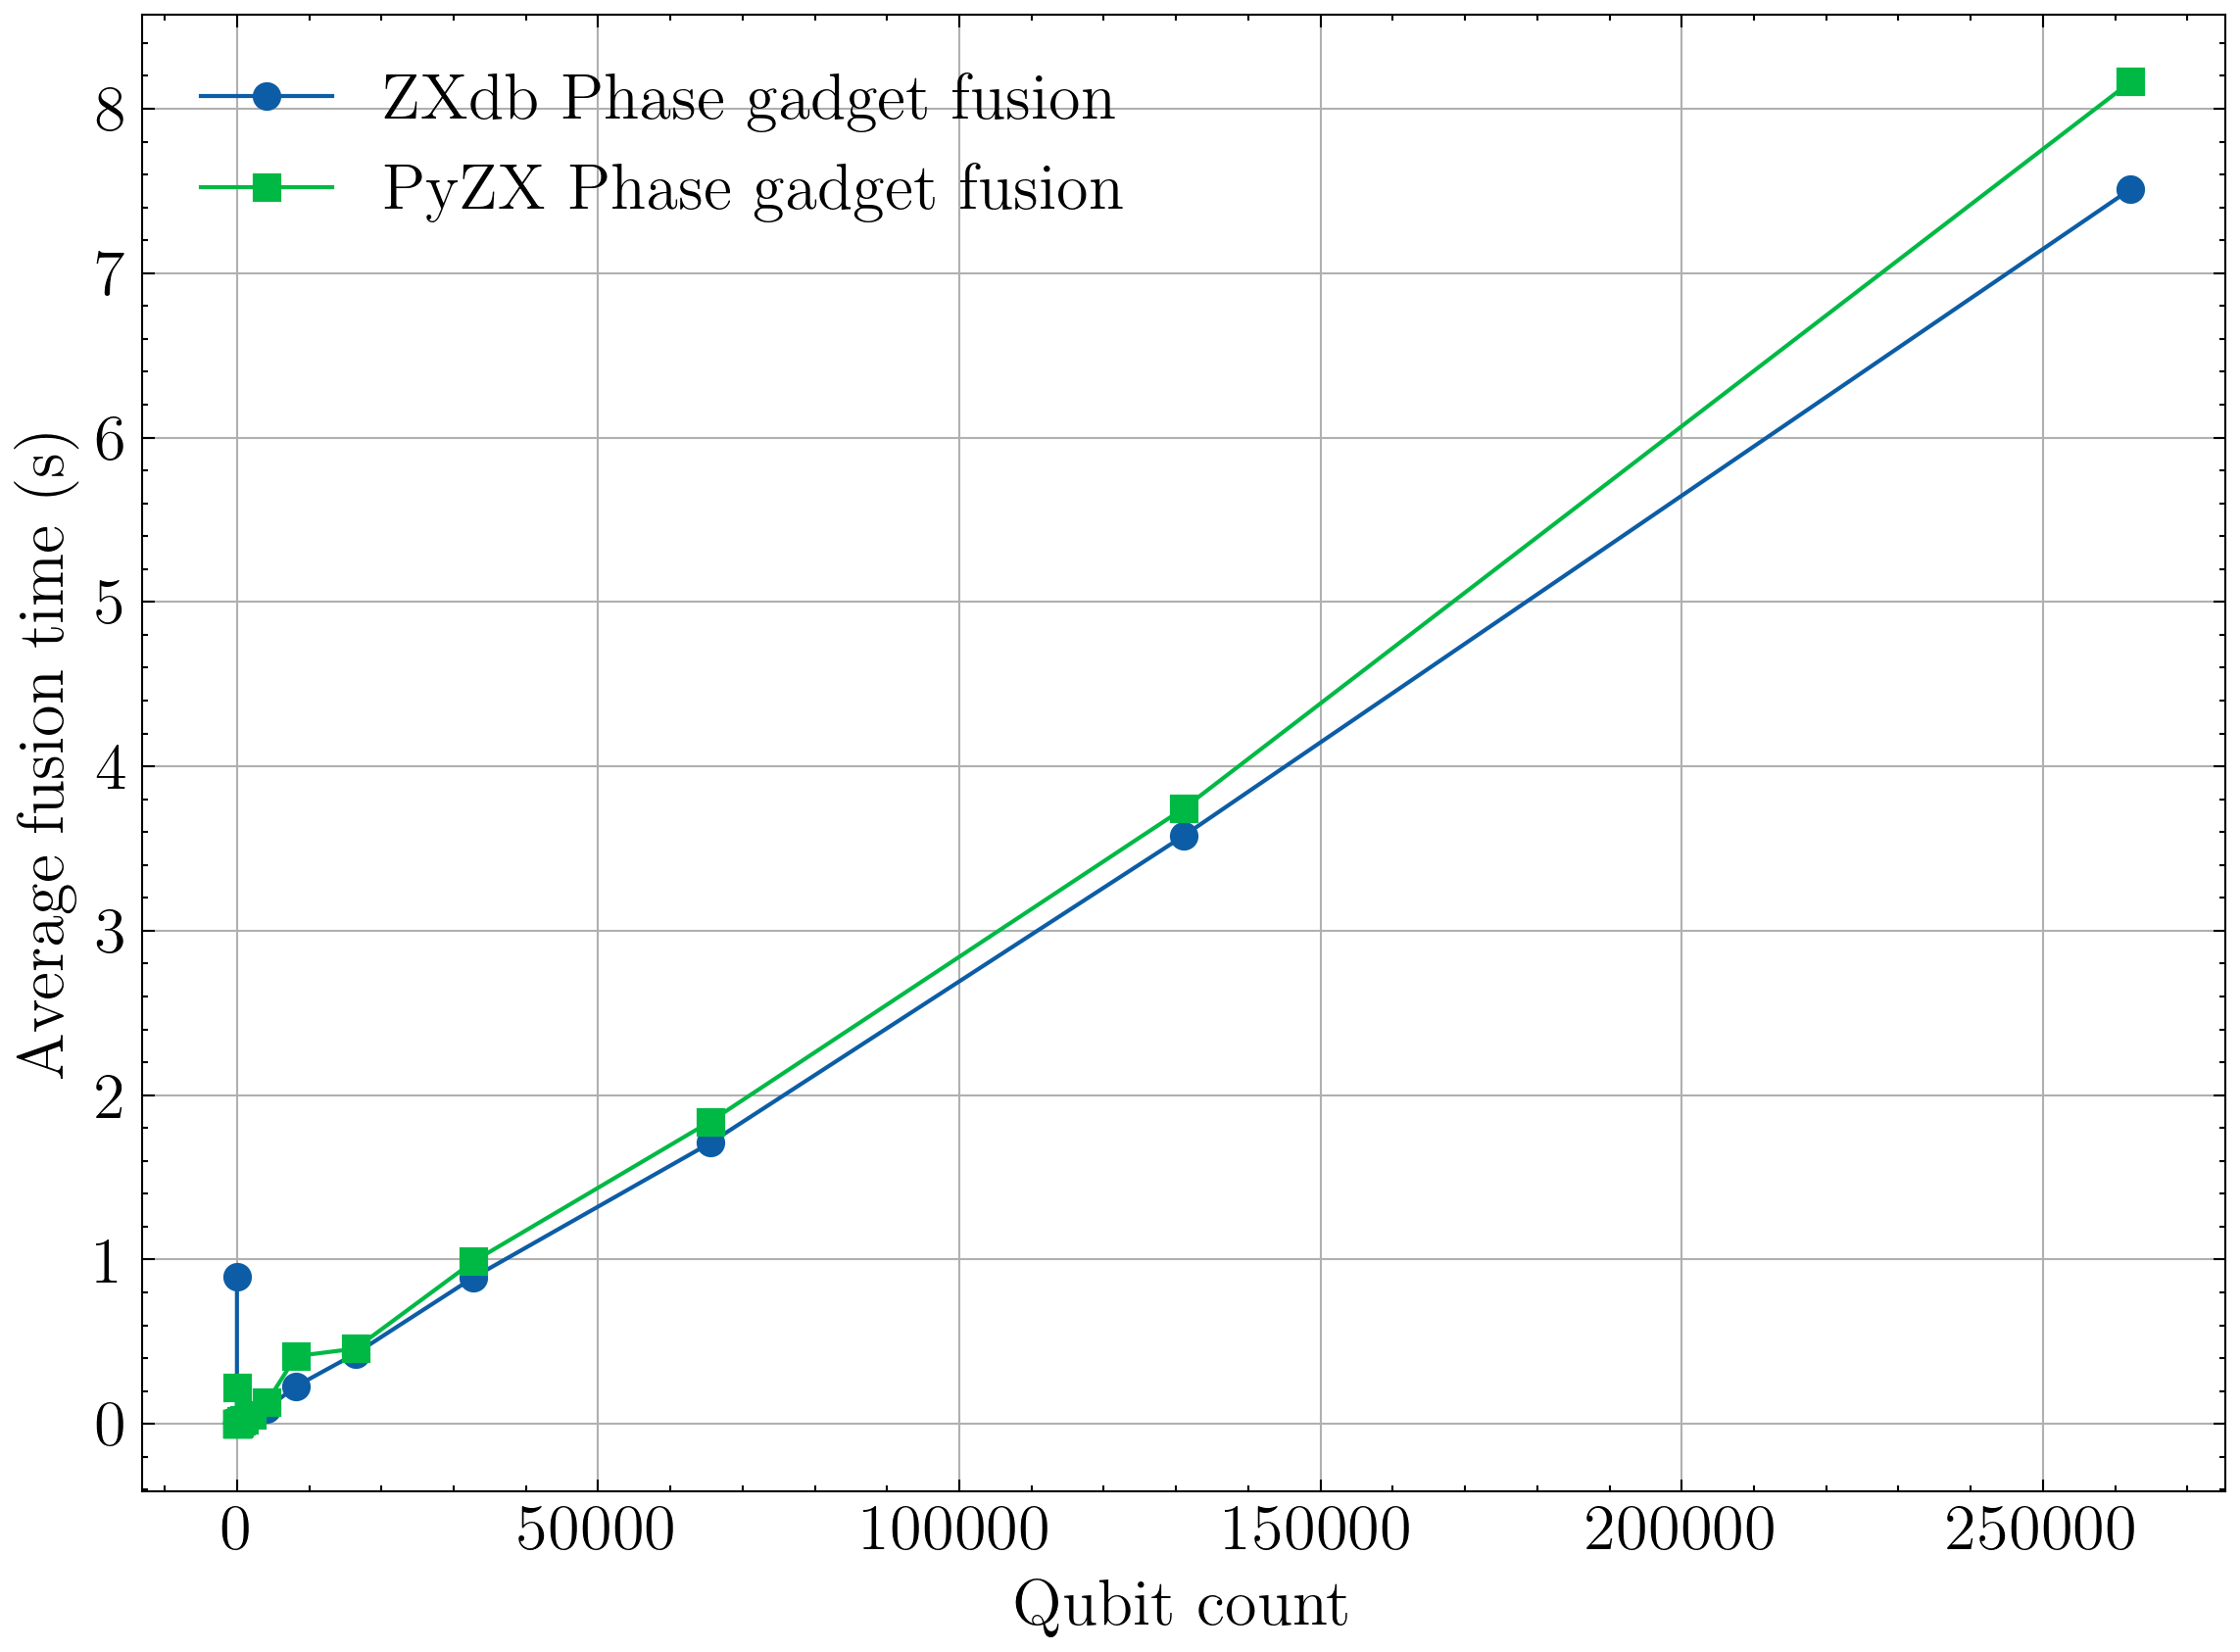

In [1]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots
from collections import defaultdict

plt.style.use('science')
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

# Path to your experiment folder
rules = ["spider_fusion", "bialgebra_simp", "pivot_boundary", "pivot_gadget_rule", "pivot", "phase_gadget_fusion"]
name_in_legends = ["Spider fusion", "Bialgebra simplification", "Pivot boundary", "Pivot gadget", "Pivot", "Phase gadget fusion"]
index = 5  # Change this index to switch between rules
rule = rules[index]
name_in_legend = name_in_legends[index]
folder = rule

# Collect results
results = defaultdict(lambda: {'db': [], 'pyzx': []})

for fname in os.listdir(folder):
    if fname.endswith('.json'):
        with open(os.path.join(folder, fname), 'r') as f:
            data = json.load(f)
            qubits = data.get('qubits')
            db_time = data.get(f'db_{rule}_time')
            pyzx_time = data.get(f'pyzx_{rule}_time')
            if qubits is not None and db_time is not None and pyzx_time is not None:
                results[qubits]['db'].append(db_time)
                results[qubits]['pyzx'].append(pyzx_time)

# Prepare data for plotting
qubit_counts = sorted(results.keys())
db_times = [sum(results[q]['db'])/len(results[q]['db']) for q in qubit_counts]
pyzx_times = [sum(results[q]['pyzx'])/len(results[q]['pyzx']) for q in qubit_counts]

print(qubit_counts)
print(db_times)
print(pyzx_times)

# Plot
plt.figure(figsize=(8,6))
plt.plot(qubit_counts, db_times, 'o-', label=f'ZXdb {name_in_legend}')
plt.plot(qubit_counts, pyzx_times, 's-', label=f'PyZX {name_in_legend}')
plt.xlabel('Qubit count')
plt.ylabel('Average fusion time (s)')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
def tikz_plot_two_series(x, y1, y2, xlabel="Input Size", ylabel="Value", 
                         legend1="Series 1", legend2="Series 2", title=None,
                         ymode=None):
    """
    Generate an academically professional TikZ/PGFPlots snippet for two datasets.

    Parameters
    ----------
    x : list of float
        X-axis data.
    y1 : list of float
        First dataset values.
    y2 : list of float
        Second dataset values.
    xlabel : str
        Label for x-axis.
    ylabel : str
        Label for y-axis.
    legend1 : str
        Legend entry for first dataset.
    legend2 : str
        Legend entry for second dataset.
    title : str, optional
        Title for the plot.
    ymode : str, optional
        'log' for logarithmic y-axis, otherwise linear.
    """
    header = [
        "\\begin{tikzpicture}",
        "  \\begin{axis}[",
        "    width=10cm,",
        "    height=6cm,",
        f"    xlabel={{{xlabel}}},",
        f"    ylabel={{{ylabel}}},",
        "    grid=both,",
        "    grid style={line width=.1pt, draw=gray!30},",
        "    major grid style={line width=.2pt,draw=gray!60},",
        "    minor tick num=1,",
        "    legend style={at={(0.02,0.98)},anchor=north west, font=\\small},",
        "    every axis plot/.append style={thick},",
    ]
    
    if ymode == "log":
        header.append("    ymode=log,")
    if title:
        header.append(f"    title={{{title}}},")

    header.append("  ]")

    coords1 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y1))
    coords2 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y2))

    plot1 = (
        "    \\addplot+[mark=*, color=blue] "
        f"coordinates {{{coords1}}};\n"
        f"    \\addlegendentry{{{legend1}}}"
    )
    plot2 = (
        "    \\addplot+[mark=square*, color=red] "
        f"coordinates {{{coords2}}};\n"
        f"    \\addlegendentry{{{legend2}}}"
    )

    footer = [
        "  \\end{axis}",
        "\\end{tikzpicture}",
    ]

    return "\n".join(header + [plot1, plot2] + footer)


In [3]:
tikz_code = tikz_plot_two_series(
    qubit_counts, db_times, pyzx_times,
    xlabel="Qubit Count",
    ylabel="Average Time (s)",
    legend1="ZXdb",
    legend2="PyZX",
    title="Scaling Comparison",
    ymode="log"  # since values span several orders of magnitude
)

print(tikz_code)

\begin{tikzpicture}
  \begin{axis}[
    width=10cm,
    height=6cm,
    xlabel={Qubit Count},
    ylabel={Average Time (s)},
    grid=both,
    grid style={line width=.1pt, draw=gray!30},
    major grid style={line width=.2pt,draw=gray!60},
    minor tick num=1,
    legend style={at={(0.02,0.98)},anchor=north west, font=\small},
    every axis plot/.append style={thick},
    ymode=log,
    title={Scaling Comparison},
  ]
    \addplot+[mark=*, color=blue] coordinates {(1, 0.8975282666644835)
(2, 0.0068137999915052205)
(4, 0.005614099995000288)
(8, 0.005756599974120036)
(16, 0.00510109998867847)
(32, 0.00565679999999702)
(64, 0.006853999977465719)
(128, 0.007971450002514757)
(256, 0.010243899974739179)
(512, 0.018778500001644716)
(1024, 0.026055800000904128)
(2048, 0.05027370000607334)
(4096, 0.09281000000191852)
(8192, 0.22910769999725744)
(16384, 0.4266766499931691)
(32768, 0.8919947499962291)
(65536, 1.709502199984854)
(131072, 3.5778464000031818)
(262144, 7.511175199993886)};
    \ad